# 1. Collaborative Filtering (협업 필터링) 리뷰
- 추천 시스템: 고객의 선호, 관심, 구매경력과 같은 개인화 정보를 기초로 고객에게 가장 알맞은 구매정보 제공
- 방식
  - Item-based collaborative filtering: item 간 similarity를 기반으로 추천
  - User-based collaborative filtering: user 간 similarity를 기반으로 추천
    - 성능이 다른 방식에 비해 떨어지는 것으로 알려져있음
  - Matrix factorization collaborative filtering: 잠재요인이 있다고 가정하여, 그 잠재요인을 행렬분해를 통해 찾아냄
    - 일반적으로 SVD(singular value decomposition)을 활용

- Input: user-item matrix (preference matrix)
  - 일반적으로 5점 척도로 구성된 rating + cosine similarity
  - binary인 경우 jaccard similarity 사용

- 한계
  - 단순 matrix를 사용하여 추천하기 때문에 context/content를 고려하지 않음
    - 최근에는 item의 text 정보, user의 context 정보들을 반영하여 딥러닝 기반의 추천 시스템 등장

In [ ]:
import pandas as pd
df = pd.read_csv('movies.csv')

In [ ]:
df.head()

,userId,title,rating,timestamp
0,1,American Pie,4.0,1260759139
1,4,American Pie,4.0,949896114
2,15,American Pie,4.0,1052896867
3,30,American Pie,2.0,994439964
4,34,American Pie,4.0,973747765


In [ ]:
df = df.pivot_table('rating', index = 'userId', columns = 'title')
df.head()

title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,...,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(670, 856)

- user들별로 평점을 주는 범위가 다르기 때문에 scaling하여 조정

In [ ]:
import numpy as np
df_scaled = df.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

## Item-based collaborative filtering
- Item*user으로 구성된 matrix를 사용하여 유사도 측정

In [ ]:
df_scaled = df_scaled.transpose().fillna(0)
df_scaled.head(5)

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.060526,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
15 Minutes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
16 Blocks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


- user들 간 평점이 비슷한 정도를 기반으로 영화들의 유사도 평가

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
movie_sim = cosine_similarity(df_scaled, df_scaled)
print(movie_sim.shape)

(856, 856)


In [ ]:
movie_sim = pd.DataFrame(movie_sim, index = df_scaled.index, columns = df_scaled.index)

In [ ]:
movie_sim['Snow White and the Seven Dwarfs'].sort_values(ascending=False)[:10]

title
Garfield                           1.000000
The Matrix                         1.000000
Snow White and the Seven Dwarfs    1.000000
Highlander                         1.000000
Alvin and the Chipmunks            0.922721
Prom Night                         0.913674
They Live                          0.558437
Zodiac                             0.546653
The Dark Knight                    0.491283
Shine a Light                      0.463028
Name: Snow White and the Seven Dwarfs, dtype: float64

#2. Surprise 리뷰

In [ ]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095412 sha256=981eac56775e8f471acb3df785d73e0e29f50f105c632a06e08dc363e861f37d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
df = pd.read_csv('movies.csv')

In [ ]:
from surprise import Reader, Dataset, KNNBasic
from surprise.model_selection import cross_validate
import pandas as pd

# Prepare the data to be used in Surprise
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(df[['userId', 'title', 'rating']], reader=reader) # user item rating 순서대로 있어야한다.


In [ ]:
data

In [ ]:
sim_options = {
    'name': 'cosine',
    'user_based': True
}
algo = KNNBasic(sim_options=sim_options)

# Retrieve the trainset.
trainset = data.build_full_trainset()
algo.fit(trainset)

# Predict
print(algo.predict(1, 5, r_ui=None, verbose=True))

Computing the cosine similarity matrix...
Done computing similarity matrix.
user: 1          item: 5          r_ui = None   est = 3.54   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: 1          item: 5          r_ui = None   est = 3.54   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


- Surprise 지원 알고리즘
 - Random : 랜덤한 추천
 - Baseline : ALS(Alternating Least Square), SGD(Stochastic Gradient Descent)
 - Matrix factorization: SVD, SVD++
 - KNNs
 - Slope one, Co clustering

 - https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html

In [ ]:
from surprise import BaselineOnly
from surprise import KNNWithMeans, KNNBasic, KNNBaseline
from surprise import SVD
from surprise import SVDpp

from surprise import accuracy
from surprise import Dataset
from surprise.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
trainset, testset = train_test_split(data, test_size = 0.25)

In [ ]:
recom = BaselineOnly()
recom.fit(trainset)
predictions = recom.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9075


0.9074860385797194

In [ ]:
recom = KNNBasic()  #CF
recom.fit(trainset)
predictions = recom.test(testset)
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9568


0.9568410612564118

In [ ]:
recom = SVDpp()  #CF
recom.fit(trainset)
predictions = recom.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8999


0.8999405834810849

- ml-100k에 대해서 여러 추천 알고리즘을 수행하고 비교

In [ ]:
# MovieLens 100K
data = Dataset.load_builtin(name=u'ml-100k', prompt = False)
trainset, testset = train_test_split(data, test_size = 0.25)

Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
algorithms = [BaselineOnly, KNNWithMeans, KNNBasic, KNNBaseline, SVD, SVDpp]

algos=[]
rmses=[]

for i in algorithms:
  algo = i()
  algos.append(i.__name__)
  algo.fit(trainset)
  predictions = algo.test(testset)
  rmses.append(accuracy.rmse(predictions))



Estimating biases using als...
RMSE: 0.9417
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9478
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9796
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9291
RMSE: 0.9365
RMSE: 0.9173


In [ ]:
algos = np.array(algos)
rmses = np.array(rmses)
algos
rmses


array([0.94166239, 0.94776738, 0.97961506, 0.92913193, 0.9364994 ,
       0.91727361])

<Axes: >

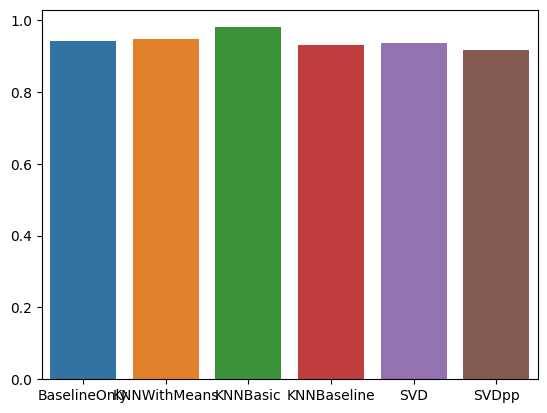

In [ ]:
import seaborn as sns
sns.barplot(x=algos, y=rmses)